In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib ipympl

#%matplotlib inline

In [16]:
#df = pd.read_csv('/home/walter/Work/data/2021-12-19-dataOnSpike.csv')
df = pd.read_csv('/home/walter/Work/data/2022-02-06-dataDCcycle.csv')
df
df.Time

0       2022-2-6T22:21:52
1       2022-2-6T22:22:52
2       2022-2-6T22:23:53
3       2022-2-6T22:24:53
4       2022-2-6T22:25:53
              ...        
3420    2022-2-9T07:53:42
3421    2022-2-9T07:54:42
3422    2022-2-9T07:55:43
3423    2022-2-9T07:56:43
3424    2022-2-9T07:57:43
Name: Time, Length: 3425, dtype: object

In [17]:
print(df.head())

                Time                      SerialNumber     A0  A0tempF   A1  \
0  2022-2-6T22:21:52  2251441C44100820F80BA000A0000057  149.0    73.09  508   
1  2022-2-6T22:22:52  2251441C44100820F80BA000A0000057  149.0    73.09  508   
2  2022-2-6T22:23:53  2251441C44100820F80BA000A0000057  149.0    73.09  508   
3  2022-2-6T22:24:53  2251441C44100820F80BA000A0000057  149.0    73.09  508   
4  2022-2-6T22:25:53  2251441C44100820F80BA000A0000057  149.0    73.09  508   

   A1volt   A2  A2volt   A3  A3volt  ...  D4  D5  D6  D7  D8  D9  D10  D11  \
0    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
1    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
2    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
3    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   
4    2.48  509    2.48  343   13.72  ...   1   1   0   1   1   1    1    1   

   D12  D13  
0    1    1  
1    1    1  
2    1    1  


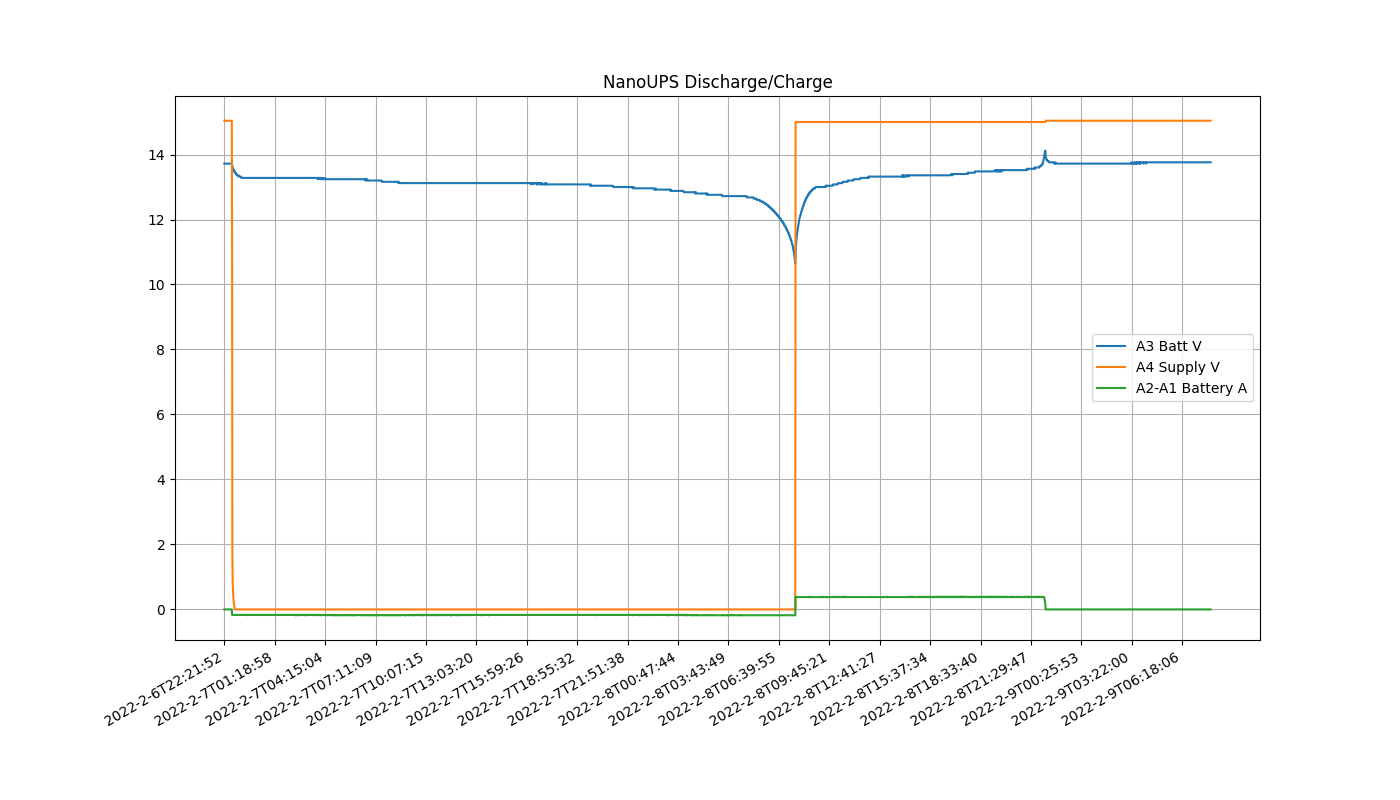

In [18]:
#plt.plot(df.Time, df.A3volt)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(df.Time, df.A3volt, label='A3 Batt V')
ax.plot(df.Time, df.A4volt, label='A4 Supply V')
ax.plot(df.Time, df.A2volt - df.A1volt, label='A2-A1 Battery A')
ax.set_xticks(np.arange(0, len(df.Time)+1, 175))
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("NanoUPS Discharge/Charge")
plt.show()